# Prediccion del Rating de apps (intento classifier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Dataset

In [2]:
df = pd.read_csv("GooglePlayStoreFE.csv", engine='python', encoding='utf-8', error_bad_lines=False)

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_85404/3023763804.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("GooglePlayStoreFE.csv", engine='python', encoding='utf-8', error_bad_lines=False)


In [3]:
df=df.drop(['Rating.Count'], axis=1)

In [4]:
df = df.rename(columns={'Maximum.Installs':'MaximumInstalls',
                        'Size.mb':'SizeMB',
                        'Ad.Supported':'AdSupported',
                        'In.App.Purchases':'InAppPurchases',
                        'Editors.Choice':'EditorsChoice',
                        'Last.UpdatedDA':'LastUpdatedDA',
                        'Minimum.Andorid':'MinimumAndroid',
                        'Developer.Id':'DeveloperId',
                        'Content.Rating':'ContentRating'})

df.columns

Index(['Unnamed: 0', 'Rating', 'MaximumInstalls', 'Price', 'SizeMB', 'Free',
       'AdSupported', 'InAppPurchases', 'EditorsChoice', 'ReleasedDA',
       'LastUpdatedDA', 'Category', 'MinimumAndroid', 'DeveloperId',
       'ContentRating'],
      dtype='object')

In [5]:
df = df.drop(df[df['Rating']==0].index)

Encoding

In [6]:
cont = {'Everyone' : 1,
        'Everyone 10+' : 2,
        'Teen' : 3,
        'Mature 17+' : 4,
        'Adults only 18+' : 5}
df['ContentRatingOrdinal']=df.ContentRating.map(cont)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1


In [7]:
fe=df.groupby('DeveloperId').size()/len(df)
df.loc[:,'Dev_freq_encode']=df['DeveloperId'].map(fe)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal,Dev_freq_encode
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1,7.524738e-06
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1,1.672164e-06
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1,1.672164e-06
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1,8.360820e-07
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1,1.555112e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3,4.180410e-06
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1,5.852574e-06
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1,8.360820e-07
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1,7.859170e-05


In [8]:
fe2=df.groupby('MinimumAndroid').size()/len(df)
df.loc[:,'Android_freq_encode']=df['MinimumAndroid'].map(fe2)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal,Dev_freq_encode,Android_freq_encode
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1,7.524738e-06,0.162943
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1,1.672164e-06,0.079761
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1,1.672164e-06,0.284611
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1,8.360820e-07,0.162943
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1,1.555112e-04,0.284611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3,4.180410e-06,0.079761
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1,5.852574e-06,0.013077
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1,8.360820e-07,0.284611
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1,7.859170e-05,0.162943


In [9]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Category'])
dfbin = encoder.fit_transform(df['Category'])
df = pd.concat([df,dfbin], axis=1)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,...,ContentRating,ContentRatingOrdinal,Dev_freq_encode,Android_freq_encode,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,...,Everyone,1,7.524738e-06,0.162943,0,0,0,0,0,1
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,...,Everyone,1,1.672164e-06,0.079761,0,0,0,0,1,0
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,...,Everyone,1,1.672164e-06,0.284611,0,0,0,0,1,1
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,...,Everyone,1,8.360820e-07,0.162943,0,0,0,1,0,0
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,...,Everyone,1,1.555112e-04,0.284611,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,...,Teen,3,4.180410e-06,0.079761,1,0,1,0,0,0
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,...,Everyone,1,5.852574e-06,0.013077,0,1,0,1,0,0
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,...,Everyone,1,8.360820e-07,0.284611,0,1,1,0,0,0
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,...,Everyone,1,7.859170e-05,0.162943,0,1,0,1,0,0


In [10]:
df_original = df

In [11]:
df_original.columns

Index(['Unnamed: 0', 'Rating', 'MaximumInstalls', 'Price', 'SizeMB', 'Free',
       'AdSupported', 'InAppPurchases', 'EditorsChoice', 'ReleasedDA',
       'LastUpdatedDA', 'Category', 'MinimumAndroid', 'DeveloperId',
       'ContentRating', 'ContentRatingOrdinal', 'Dev_freq_encode',
       'Android_freq_encode', 'Category_0', 'Category_1', 'Category_2',
       'Category_3', 'Category_4', 'Category_5'],
      dtype='object')

In [12]:
df= df.drop(['Unnamed: 0', 'Category', 'MinimumAndroid', 'DeveloperId', 'ContentRating'], axis=1)

Redondeo de Rating

In [13]:
df['RatingR']=round(df['Rating'])
df['RatingR']

1          4.0
3          5.0
5          4.0
6          2.0
7          5.0
          ... 
2225309    4.0
2225310    4.0
2225314    3.0
2225317    4.0
2225318    5.0
Name: RatingR, Length: 1196055, dtype: float64

In [14]:
print(df['RatingR'].unique())

[4. 5. 2. 3. 1.]


([<matplotlib.axis.XTick at 0x173f7faf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

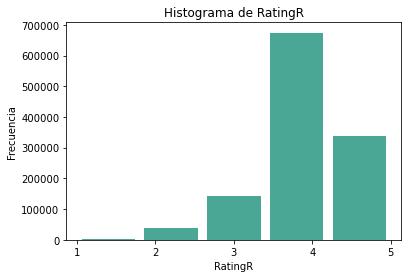

In [15]:
i=range(1,6)
plt.hist(df['RatingR'], bins=5,color='#4aa796', rwidth=0.85)
plt.title('Histograma de RatingR')
plt.xlabel('RatingR')
plt.ylabel('Frecuencia')
plt.xticks(i)

Separación test & train

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X= df[['MaximumInstalls','Price','SizeMB', 'Free', 'AdSupported', 'InAppPurchases', 'EditorsChoice',
       'ReleasedDA', 'LastUpdatedDA','ContentRatingOrdinal',
       'Dev_freq_encode', 'Android_freq_encode', 'Category_0', 'Category_1',
       'Category_2', 'Category_3', 'Category_4', 'Category_5']]
y= df[['RatingR']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(956844, 18)
(956844, 1)
(239211, 18)
(239211, 1)


### Histogram Gradient Boosting Classifier

In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [20]:
m= HistGradientBoostingClassifier(random_state=0)

In [21]:
m.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(random_state=0)

In [22]:
m.score(X_test, y_test)

0.6383318492878672

In [23]:
m.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'auto',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 0,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Balanced accuracy score**

In [24]:
from sklearn.metrics import balanced_accuracy_score

In [26]:
y_predm=m.predict(X_test)

In [27]:
balanced_accuracy_score(y_test, y_predm)

0.2750987775505781

Mejores parámetros (regresion)

In [28]:
m3=HistGradientBoostingClassifier(learning_rate=0.2, random_state=0,min_samples_leaf=200, max_depth=16, max_leaf_nodes=10001)

In [29]:
m3.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(learning_rate=0.2, max_depth=16,
                               max_leaf_nodes=10001, min_samples_leaf=200,
                               random_state=0)

In [30]:
m3.score(X_test, y_test)

0.6437914644393443

In [31]:
y_predm3 = m3.predict(X_test)

In [32]:
accuracy_score(y_test, y_predm3)

0.6437914644393443

In [33]:
balanced_accuracy_score(y_test, y_predm3)

0.2875246533097324

Ajuste de hiperparámetros

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters = [{'learning_rate': [0.2, 0.3], 'max_depth':[12, 16],
'min_samples_leaf':[190,200],'max_leaf_nodes':[9001, 10001]}]
clf = GridSearchCV(m, parameters, cv=2)
clf.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(random_state=0),
             param_grid=[{'learning_rate': [0.2, 0.3], 'max_depth': [12, 16],
                          'max_leaf_nodes': [9001, 10001],
                          'min_samples_leaf': [190, 200]}])

In [36]:
clf.best_score_

0.6420137451873033

In [37]:
clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 12,
 'max_leaf_nodes': 9001,
 'min_samples_leaf': 200}

In [38]:
m4= HistGradientBoostingClassifier(random_state=0, learning_rate=0.2, 
max_depth=12, min_samples_leaf=200, max_leaf_nodes=9001)

In [39]:
m4.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(learning_rate=0.2, max_depth=12,
                               max_leaf_nodes=9001, min_samples_leaf=200,
                               random_state=0)

In [40]:
m4.score(X_test, y_test)

0.6440422890251702

In [41]:
y_predm4 = m4.predict(X_test)

In [42]:
accuracy_score(y_test, y_predm4)

0.6440422890251702

In [43]:
balanced_accuracy_score(y_test, y_predm4)

0.28510884219261945

Light GBM Classifier

In [44]:
from lightgbm import LGBMClassifier

In [45]:
m5=LGBMClassifier(is_unbalance=True)

In [46]:
m5.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(is_unbalance=True)

In [47]:
m5.score(X_test, y_test)

0.6392640806651868

In [48]:
y_predm5 = m5.predict(X_test)

In [49]:
accuracy_score(y_test, y_predm5)

0.6392640806651868

In [50]:
balanced_accuracy_score(y_test, y_predm5)

0.27578503961274414

Over sampling (imbalanced)

In [52]:
#conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/camilacollado/opt/miniconda3/envs/myenv

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you 

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [55]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_res, y_res, test_size=0.2)

In [63]:
print(X_trainR.shape)
print(y_trainR.shape)
print(X_testR.shape)
print(y_testR.shape)

(2696900, 18)
(2696900, 1)
(674225, 18)
(674225, 1)


Probar un modelo con la base del oversampling

In [56]:
m4.fit(X_trainR, y_trainR)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingClassifier(learning_rate=0.2, max_depth=12,
                               max_leaf_nodes=9001, min_samples_leaf=200,
                               random_state=0)

In [57]:
m4.score(X_testR, y_testR)

0.7236960955170751

In [60]:
y_predm4R = m4.predict(X_testR)

In [61]:
accuracy_score(y_testR, y_predm4R)

0.7236960955170751

In [62]:
balanced_accuracy_score(y_testR, y_predm4R)

0.723829250092666

Matriz de confusión

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

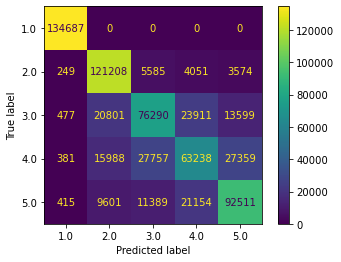

In [66]:
predictions = m4.predict(X_test)
cm = confusion_matrix(y_testR, y_predm4R, labels=m.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
disp.plot()
plt.show()

Métricas

In [67]:
y_true=y_testR
y_pred=y_predm4R

**Accuracy / Exactitud** (proporción de predicciones que el modelo clasificó correctamente)

In [68]:
accuracy_score(y_true, y_pred)

0.7236960955170751

**Recall / Sensibilidad** (qué proporción de positivos reales se identificó correctamente)

In [69]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([1.        , 0.90005718, 0.56478479, 0.46939275, 0.68491153])

In [70]:
tabla= pd.DataFrame(m.classes_, columns={'Class'})
tabla['Recall']=recall_score(y_true, y_pred, average=None)
tabla

,Class,Recall
0,1.0,1.000000
1,2.0,0.900057
2,3.0,0.564785
3,4.0,0.469393
4,5.0,0.684912


**Precision** (de todas las identificaciones positivas cuantas fueron realmente correctas)

In [71]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.988826  , 0.72320672, 0.63038646, 0.562846  , 0.6750509 ])

In [72]:
tabla1= pd.DataFrame(m.classes_, columns={'Class'})
tabla1['Precision']=precision_score(y_true, y_pred, average=None)
tabla1

,Class,Precision
0,1.0,0.988826
1,2.0,0.723207
2,3.0,0.630386
3,4.0,0.562846
4,5.0,0.675051


**Puntaje F1** (maximo 1, minimo 0)

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_true, y_pred, average='weighted')

0.716695326193371

F Beta

In [75]:
from sklearn.metrics import fbeta_score

In [77]:
fbeta_score(y_true, y_pred, average='micro', beta=0.5)

0.7236960955170751

In [78]:
fbeta_score(y_true, y_pred, average='macro', beta=0.5) #no tiene en cuenta label imbalance 

0.7156395184050005

Curva ROC

In [82]:
#pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [83]:
from scikitplot.metrics import plot_roc

In [85]:
y_pred_proba = m4.predict_proba(X_testR)

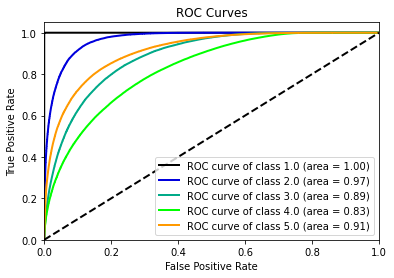

In [86]:
plot_roc(y_true, y_pred_proba, plot_micro=False, plot_macro=False)
plt.show()